In [1]:
import pandas as pd
import matplotlib.patches as mpatches
import numpy as np
import datetime
%matplotlib inline
import matplotlib.pyplot as plt
import plotly.express as px 
import plotly.graph_objects as go
import seaborn as sns
import cufflinks as cf
import plotly as py
py.offline.init_notebook_mode(connected = True)
cf.go_offline()
sns.set()

## Importing the data
https://web.stanford.edu/~hastie/ElemStatLearn/
https://github.com/sahilverma0696/heart-disease-prediction/blob/master/main.ipynb
https://www.kaggle.com/yassinehamdaoui1/cardiovascular-disease/notebooks

In [2]:
df = pd.read_csv('SAheart.csv')
df = df.drop(columns=['row.names'])
df

,systolic blood pressure,tobacco (kg),cholesterol,adiposity,family history of heart disease,type-A behavior,obesity,current alcohol consumption,age at onset,"response, coronary heart disease"
0,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1
...,...,...,...,...,...,...,...,...,...,...
457,214,0.40,5.98,31.72,Absent,64,28.45,0.00,58,0
458,182,4.20,4.41,32.10,Absent,52,28.61,18.72,52,1
459,108,3.00,1.59,15.23,Absent,40,20.09,26.64,55,0
460,118,5.40,11.61,30.79,Absent,64,27.35,23.97,40,0


## Feature transformation

In [3]:
dic = {'Present':1, 'Absent':0}
df['family history of heart disease'] = df['family history of heart disease'].replace(dic)
df

,systolic blood pressure,tobacco (kg),cholesterol,adiposity,family history of heart disease,type-A behavior,obesity,current alcohol consumption,age at onset,"response, coronary heart disease"
0,160,12.00,5.73,23.11,1,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,0,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,1,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,1,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,1,60,25.99,57.34,49,1
...,...,...,...,...,...,...,...,...,...,...
457,214,0.40,5.98,31.72,0,64,28.45,0.00,58,0
458,182,4.20,4.41,32.10,0,52,28.61,18.72,52,1
459,108,3.00,1.59,15.23,0,40,20.09,26.64,55,0
460,118,5.40,11.61,30.79,0,64,27.35,23.97,40,0


## A quick description of the data

In [6]:
df.describe()

,systolic blood pressure,tobacco (kg),cholesterol,adiposity,family history of heart disease,type-A behavior,obesity,current alcohol consumption,age at onset,"response, coronary heart disease"
count,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000
mean,138.326840,3.635649,4.740325,25.406732,0.415584,53.103896,26.044113,17.044394,42.816017,0.346320
std,20.496317,4.593024,2.070909,7.780699,0.493357,9.817534,4.213680,24.481059,14.608956,0.476313
min,101.000000,0.000000,0.980000,6.740000,0.000000,13.000000,14.700000,0.000000,15.000000,0.000000
25%,124.000000,0.052500,3.282500,19.775000,0.000000,47.000000,22.985000,0.510000,31.000000,0.000000
50%,134.000000,2.000000,4.340000,26.115000,0.000000,53.000000,25.805000,7.510000,45.000000,0.000000
75%,148.000000,5.500000,5.790000,31.227500,1.000000,60.000000,28.497500,23.892500,55.000000,1.000000
max,218.000000,31.200000,15.330000,42.490000,1.000000,78.000000,46.580000,147.190000,64.000000,1.000000


In [7]:
df.isnull().sum()   # This implies no missing values

systolic blood pressure             0
tobacco (kg)                        0
cholesterol                         0
adiposity                           0
family history of heart disease     0
type-A behavior                     0
obesity                             0
current alcohol consumption         0
age at onset                        0
response, coronary heart disease    0
dtype: int64

## Visualizing the attribute CHD

In [8]:
hello = df['response, coronary heart disease'].value_counts()

In [9]:
fig = px.bar(df['response, coronary heart disease'],  x=[0,1], y = df['response, coronary heart disease'].value_counts() )
fig.show()

## Visualizing the attribute family history of heart diseases

In [10]:
df['family history of heart disease'].value_counts()
famhist_height = df['family history of heart disease'].value_counts()

In [11]:
fig = px.bar(df['family history of heart disease'], x=['Absent','Present'], y=famhist_height)
fig.show()

## Making box plot

In [12]:
data=df.iloc[:,:-1]
data

,systolic blood pressure,tobacco (kg),cholesterol,adiposity,family history of heart disease,type-A behavior,obesity,current alcohol consumption,age at onset
0,160,12.00,5.73,23.11,1,49,25.30,97.20,52
1,144,0.01,4.41,28.61,0,55,28.87,2.06,63
2,118,0.08,3.48,32.28,1,52,29.14,3.81,46
3,170,7.50,6.41,38.03,1,51,31.99,24.26,58
4,134,13.60,3.50,27.78,1,60,25.99,57.34,49
...,...,...,...,...,...,...,...,...,...
457,214,0.40,5.98,31.72,0,64,28.45,0.00,58
458,182,4.20,4.41,32.10,0,52,28.61,18.72,52
459,108,3.00,1.59,15.23,0,40,20.09,26.64,55
460,118,5.40,11.61,30.79,0,64,27.35,23.97,40


In [13]:
data_fmh = df.drop('family history of heart disease', axis=1)
data_fmh = df.drop('family history of heart disease', axis=1)
data_fmh

,systolic blood pressure,tobacco (kg),cholesterol,adiposity,type-A behavior,obesity,current alcohol consumption,age at onset,"response, coronary heart disease"
0,160,12.00,5.73,23.11,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,60,25.99,57.34,49,1
...,...,...,...,...,...,...,...,...,...
457,214,0.40,5.98,31.72,64,28.45,0.00,58,0
458,182,4.20,4.41,32.10,52,28.61,18.72,52,1
459,108,3.00,1.59,15.23,40,20.09,26.64,55,0
460,118,5.40,11.61,30.79,64,27.35,23.97,40,0


In [14]:
dic1 = {1:'Positive', 0:'Negative'}
data_fmh['response, coronary heart disease'] = data_fmh['response, coronary heart disease'].replace(dic1)
data_fmh

,systolic blood pressure,tobacco (kg),cholesterol,adiposity,type-A behavior,obesity,current alcohol consumption,age at onset,"response, coronary heart disease"
0,160,12.00,5.73,23.11,49,25.30,97.20,52,Positive
1,144,0.01,4.41,28.61,55,28.87,2.06,63,Positive
2,118,0.08,3.48,32.28,52,29.14,3.81,46,Negative
3,170,7.50,6.41,38.03,51,31.99,24.26,58,Positive
4,134,13.60,3.50,27.78,60,25.99,57.34,49,Positive
...,...,...,...,...,...,...,...,...,...
457,214,0.40,5.98,31.72,64,28.45,0.00,58,Negative
458,182,4.20,4.41,32.10,52,28.61,18.72,52,Positive
459,108,3.00,1.59,15.23,40,20.09,26.64,55,Negative
460,118,5.40,11.61,30.79,64,27.35,23.97,40,Negative


In [15]:
vis = (data_fmh.iloc[:, :-1] - data_fmh.iloc[:, :-1].mean(axis=0))/data_fmh.iloc[:, :-1].std(axis=0)
vis['CHD'] = data_fmh['response, coronary heart disease']
vis

,systolic blood pressure,tobacco (kg),cholesterol,adiposity,type-A behavior,obesity,current alcohol consumption,age at onset,CHD
0,1.057417,1.821099,0.477894,-0.295183,-0.418017,-0.176594,3.274189,0.628654,Positive
1,0.276789,-0.789382,-0.159507,0.411694,0.193134,0.670646,-0.612081,1.381617,Positive
2,-0.991731,-0.774141,-0.608585,0.883374,-0.112441,0.734723,-0.540597,0.217947,Negative
3,1.545310,0.841352,0.806252,1.622382,-0.214300,1.411091,0.294742,1.039361,Positive
4,-0.211103,2.169453,-0.598928,0.305020,0.702427,-0.012842,1.645991,0.423301,Positive
...,...,...,...,...,...,...,...,...,...
457,3.692037,-0.704470,0.598614,0.811401,1.109862,0.570971,-0.696228,1.039361,Negative
458,2.130781,0.122871,-0.159507,0.860240,-0.112441,0.608942,0.068445,0.628654,Positive
459,-1.479624,-0.138395,-1.521228,-1.307946,-1.334744,-1.413043,0.391960,0.834008,Negative
460,-0.991731,0.384137,3.317227,0.691875,1.109862,0.309916,0.282897,-0.192760,Negative


In [16]:
fig = px.box(vis,color='CHD', color_discrete_sequence=["red", "green"]) #, points='all')
fig.update_layout(font=dict(size=14))
fig.update_yaxes(title='', visible=True, showticklabels=True)
fig.update_xaxes(title='', visible=True, showticklabels=True)
fig.show()

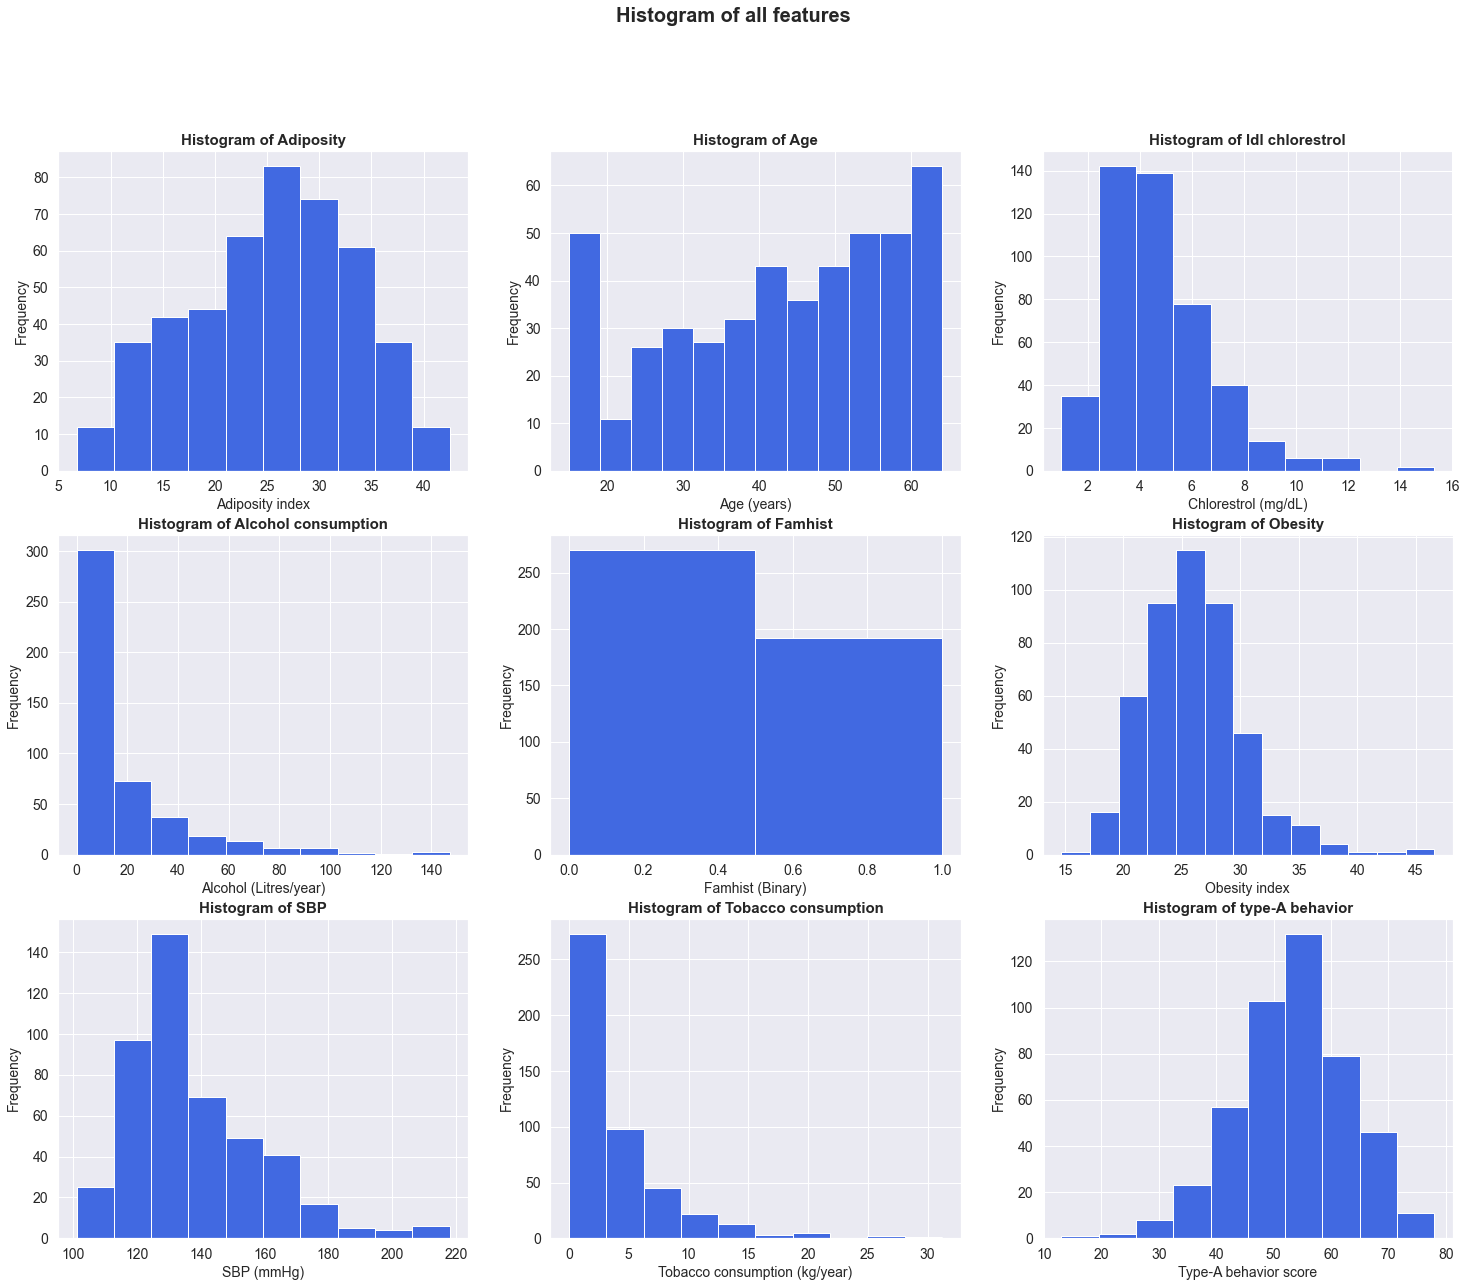

In [17]:
fig = plt.figure(figsize=(25, 20))

ax1 = plt.subplot(3, 3, 1)
ax1.hist(data['adiposity'],color='royalblue')
ax1.set_title('Histogram of Adiposity',fontsize=15, fontweight='bold')
ax1.set_xlabel('Adiposity index', fontsize=14)
ax1.set_ylabel('Frequency', fontsize=14)
ax1.tick_params(labelsize=14)

ax2 = plt.subplot(3, 3, 2)
ax2.hist(data['age at onset'],color='royalblue',bins=12)
ax2.set_title('Histogram of Age',fontsize=15, fontweight='bold')
ax2.set_xlabel('Age (years)', fontsize=14)
ax2.set_ylabel('Frequency', fontsize=14)
ax2.tick_params(labelsize=14)

ax3 = plt.subplot(3, 3, 3)
ax3.hist(data['cholesterol'],color='royalblue')
ax3.set_title('Histogram of ldl chlorestrol',fontsize=15, fontweight='bold')
ax3.set_xlabel('Chlorestrol (mg/dL)', fontsize=14)
ax3.set_ylabel('Frequency', fontsize=14)
ax3.tick_params(labelsize=14)

ax4 = plt.subplot(3, 3, 4)
ax4.hist(data['current alcohol consumption'],color='royalblue')
ax4.set_title('Histogram of Alcohol consumption',fontsize=15, fontweight='bold')
ax4.set_xlabel('Alcohol (Litres/year)', fontsize=14)
ax4.set_ylabel('Frequency', fontsize=14)
ax4.tick_params(labelsize=14)

ax5 = plt.subplot(3, 3, 5)
ax5.hist(data['family history of heart disease'],color='royalblue', bins=2)
ax5.set_title('Histogram of Famhist',fontsize=15, fontweight='bold')
ax5.set_xlabel('Famhist (Binary)', fontsize=14)
ax5.set_ylabel('Frequency', fontsize=14)
ax5.tick_params(labelsize=14)

ax6 = plt.subplot(3, 3, 6)
ax6.hist(data['obesity'],color='royalblue',bins=13)
ax6.set_title('Histogram of Obesity',fontsize=15, fontweight='bold')
ax6.set_xlabel('Obesity index', fontsize=14)
ax6.set_ylabel('Frequency', fontsize=14)
ax6.tick_params(labelsize=14)

ax7 = plt.subplot(3, 3, 7)
ax7.hist(data['systolic blood pressure'],color='royalblue')
ax7.set_title('Histogram of SBP',fontsize=15, fontweight='bold')
ax7.set_xlabel('SBP (mmHg)', fontsize=14)
ax7.set_ylabel('Frequency', fontsize=14)
ax7.tick_params(labelsize=14)

ax8 = plt.subplot(3, 3, 8)
ax8.hist(data['tobacco (kg)'],color='royalblue')
ax8.set_title('Histogram of Tobacco consumption',fontsize=15, fontweight='bold')
ax8.set_xlabel('Tobacco consumption (kg/year)', fontsize=14)
ax8.set_ylabel('Frequency', fontsize=14)
ax8.tick_params(labelsize=14)

ax9 = plt.subplot(3, 3, 9)
ax9.hist(data['type-A behavior'],color='royalblue')
ax9.set_title('Histogram of type-A behavior',fontsize=15, fontweight='bold')
ax9.set_xlabel('Type-A behavior score', fontsize=14)
ax9.set_ylabel('Frequency', fontsize=14)
ax9.tick_params(labelsize=14)


# Title the figure
fig.suptitle('Histogram of all features', fontsize=20, fontweight='bold');

## Checking the correlation

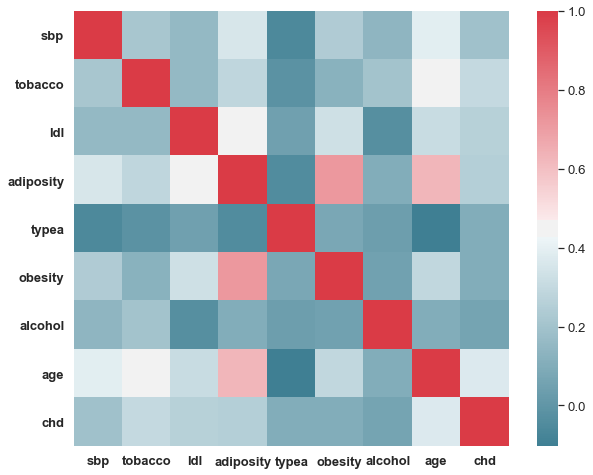

In [94]:
correlation_df = pd.read_csv('https://web.stanford.edu/~hastie/ElemStatLearn/datasets/SAheart.data')
correlation_df = correlation_df.drop(columns=['row.names'])
correlation_df['CHD'] = data_fmh['response, coronary heart disease']

figure, ax = plt.subplots(figsize=(10, 8))
corr = correlation_df.corr()
plt.xticks(fontsize=13,weight='bold')
plt.yticks(fontsize=13 ,weight='bold')
sns.set(font_scale = 1.2)
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True,ax=ax);


In [98]:
correlation_df

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd,CHD
0,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1,Positive
1,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1,Positive
2,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0,Negative
3,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1,Positive
4,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1,Positive
...,...,...,...,...,...,...,...,...,...,...,...
457,214,0.40,5.98,31.72,Absent,64,28.45,0.00,58,0,Negative
458,182,4.20,4.41,32.10,Absent,52,28.61,18.72,52,1,Positive
459,108,3.00,1.59,15.23,Absent,40,20.09,26.64,55,0,Negative
460,118,5.40,11.61,30.79,Absent,64,27.35,23.97,40,0,Negative


## PCA

## Subtracting mean value fom the data

In [120]:
Y = data - data.mean(axis=0)
Y

,systolic blood pressure,tobacco (kg),cholesterol,adiposity,family history of heart disease,type-A behavior,obesity,current alcohol consumption,age at onset
0,21.67316,8.364351,0.989675,-2.296732,0.584416,-4.103896,-0.744113,80.155606,9.183983
1,5.67316,-3.625649,-0.330325,3.203268,-0.415584,1.896104,2.825887,-14.984394,20.183983
2,-20.32684,-3.555649,-1.260325,6.873268,0.584416,-1.103896,3.095887,-13.234394,3.183983
3,31.67316,3.864351,1.669675,12.623268,0.584416,-2.103896,5.945887,7.215606,15.183983
4,-4.32684,9.964351,-1.240325,2.373268,0.584416,6.896104,-0.054113,40.295606,6.183983
...,...,...,...,...,...,...,...,...,...
457,75.67316,-3.235649,1.239675,6.313268,-0.415584,10.896104,2.405887,-17.044394,15.183983
458,43.67316,0.564351,-0.330325,6.693268,-0.415584,-1.103896,2.565887,1.675606,9.183983
459,-30.32684,-0.635649,-3.150325,-10.176732,-0.415584,-13.103896,-5.954113,9.595606,12.183983
460,-20.32684,1.764351,6.869675,5.383268,-0.415584,10.896104,1.305887,6.925606,-2.816017


In [121]:
U,S,VT = np.linalg.svd(Y,full_matrices=False)
rho = (S*S) / (S*S).sum() 
threshold = 0.9

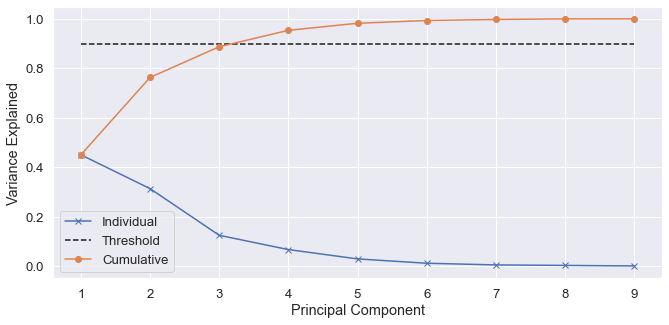

In [122]:
fig1 = plt.figure(figsize=(24,5))
ax = fig1.add_subplot(122)
ax.plot(range(1,len(rho)+1),rho,'x-')
ax.plot([1,len(rho)],[threshold, threshold],'k--')
ax.plot(range(1,len(rho)+1),np.cumsum(rho),'o-')
ax.legend(['Individual','Threshold','Cumulative'])
plt.xlabel("Principal Component")
plt.ylabel("Variance Explained")
plt.show()

In [110]:
np.cumsum(rho)

array([0.44988897, 0.7629409 , 0.8871383 , 0.95354247, 0.98215374,
       0.99326093, 0.99750575, 0.99984304, 1.        ])

#### Plotting principal components

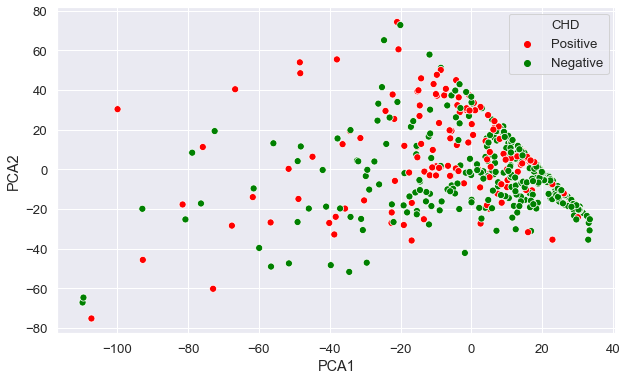

In [111]:
V = VT.T 
Z = Y @ V

color_dict = dict({'Positive':'red',
                  'Negative':'green',
                  })

fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x = Z[0], y = Z[1],hue=correlation_df['CHD'],s=50 ,palette=color_dict)
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.show()


## Subtracting mean value fom the data and dividing it by SD 

In [124]:
SD = (data - data.mean(axis=0))/data.std(axis=0)
SD

,systolic blood pressure,tobacco (kg),cholesterol,adiposity,family history of heart disease,type-A behavior,obesity,current alcohol consumption,age at onset
0,1.057417,1.821099,0.477894,-0.295183,1.184570,-0.418017,-0.176594,3.274189,0.628654
1,0.276789,-0.789382,-0.159507,0.411694,-0.842361,0.193134,0.670646,-0.612081,1.381617
2,-0.991731,-0.774141,-0.608585,0.883374,1.184570,-0.112441,0.734723,-0.540597,0.217947
3,1.545310,0.841352,0.806252,1.622382,1.184570,-0.214300,1.411091,0.294742,1.039361
4,-0.211103,2.169453,-0.598928,0.305020,1.184570,0.702427,-0.012842,1.645991,0.423301
...,...,...,...,...,...,...,...,...,...
457,3.692037,-0.704470,0.598614,0.811401,-0.842361,1.109862,0.570971,-0.696228,1.039361
458,2.130781,0.122871,-0.159507,0.860240,-0.842361,-0.112441,0.608942,0.068445,0.628654
459,-1.479624,-0.138395,-1.521228,-1.307946,-0.842361,-1.334744,-1.413043,0.391960,0.834008
460,-0.991731,0.384137,3.317227,0.691875,-0.842361,1.109862,0.309916,0.282897,-0.192760


In [125]:
U,S,VT = np.linalg.svd(SD,full_matrices=False)
rho = (S*S) / (S*S).sum() 
threshold = 0.9

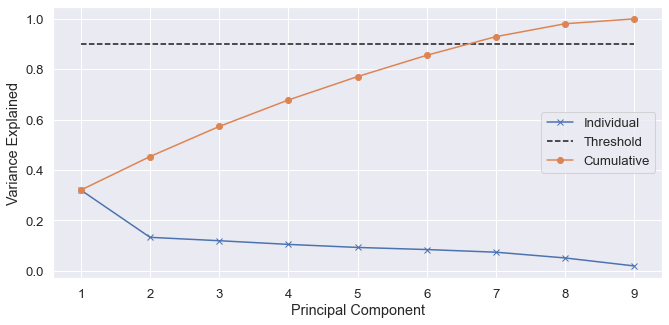

In [126]:
fig1 = plt.figure(figsize=(24,5))
ax = fig1.add_subplot(122)
ax.plot(range(1,len(rho)+1),rho,'x-')
ax.plot([1,len(rho)],[threshold, threshold],'k--')
ax.plot(range(1,len(rho)+1),np.cumsum(rho),'o-')
ax.legend(['Individual','Threshold','Cumulative'])
plt.xlabel("Principal Component")
plt.ylabel("Variance Explained")
plt.show()

In [117]:
np.cumsum(rho)

array([0.32053161, 0.45354627, 0.5730742 , 0.67804275, 0.77091703,
       0.85542993, 0.92942462, 0.98057544, 1.        ])

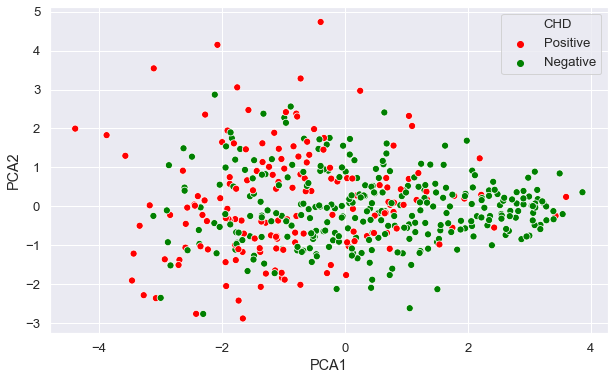

In [118]:
V = VT.T 
Z = SD @ V

color_dict = dict({'Positive':'red',
                  'Negative':'green',
                  })

fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x = Z[0], y = Z[1],hue=correlation_df['CHD'],s=50 ,palette=color_dict)
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.show()